Declare Ticker

In [1]:
ticker = "SPY"

Import the Libraries

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import MinMaxScaler



%matplotlib inline

Load the Training Dataset

In [3]:
file = "C:\\Users\\WhyglePa\\source\\repos\\algo-trading\\src\\Python\\TDAmeritrade\\Notebook\\ML\\Data\\" + ticker + "_TRAINING.csv"
print(file)
dataset_train = pd.read_csv(file)
dataset_train.head

C:\Users\WhyglePa\source\repos\algo-trading\src\Python\TDAmeritrade\Notebook\ML\Data\SPY_TRAINING.csv


<bound method NDFrame.head of            Date        Open        High         Low       Close   Adj Close  \
0    2019-01-02  245.979996  251.210007  245.949997  250.179993  235.136429   
1    2019-01-03  248.229996  248.570007  243.669998  244.210007  229.525436   
2    2019-01-04  247.589996  253.110001  247.169998  252.389999  237.213547   
3    2019-01-07  252.690002  255.949997  251.690002  254.380005  239.083923   
4    2019-01-08  256.820007  257.309998  254.000000  256.769989  241.330170   
..          ...         ...         ...         ...         ...         ...   
500  2020-12-24  368.079987  369.029999  367.450012  369.000000  359.978149   
501  2020-12-28  371.739990  372.589996  371.070007  372.170013  363.070648   
502  2020-12-29  373.809998  374.000000  370.829987  371.459991  362.377960   
503  2020-12-30  372.339996  373.100006  371.570007  371.989990  362.894989   
504  2020-12-31  371.779999  374.660004  371.230011  373.880005  364.738800   

        Volume  
0   

Use the Open Stock Price Column to Train Your Model

In [4]:
training_set = dataset_train.iloc[:,1:2].values

print(training_set)
print(training_set.shape)

[[245.979996]
 [248.229996]
 [247.589996]
 [252.690002]
 [256.820007]
 [257.559998]
 [256.26001 ]
 [257.679993]
 [256.859985]
 [257.820007]
 [260.829987]
 [260.01001 ]
 [264.980011]
 [264.820007]
 [264.01001 ]
 [263.209991]
 [265.609985]
 [263.390015]
 [263.920013]
 [265.100006]
 [267.51001 ]
 [270.149994]
 [270.109985]
 [272.440002]
 [272.790009]
 [270.940002]
 [268.75    ]
 [271.200012]
 [272.420013]
 [275.029999]
 [273.779999]
 [276.359985]
 [276.480011]
 [277.809998]
 [277.700012]
 [278.109985]
 [280.730011]
 [279.130005]
 [278.519989]
 [278.959991]
 [280.440002]
 [281.600006]
 [279.540009]
 [279.149994]
 [276.829987]
 [272.940002]
 [275.26001 ]
 [279.059998]
 [280.480011]
 [281.369995]
 [280.540009]
 [281.549988]
 [283.51001 ]
 [282.160004]
 [280.640015]
 [283.220001]
 [278.869995]
 [280.98999 ]
 [281.109985]
 [280.350006]
 [282.390015]
 [284.700012]
 [286.040009]
 [287.320007]
 [286.779999]
 [287.920013]
 [288.100006]
 [287.720001]
 [287.769989]
 [288.829987]
 [290.      ]
 [290.

Normalizing the Dataset

In [5]:
scaler = MinMaxScaler(feature_range= (0,1))
scaled_training_set = scaler.fit_transform(training_set)

scaled_training_set

array([[0.12216725],
       [0.13761842],
       [0.13322342],
       [0.16824612],
       [0.19660765],
       [0.20168931],
       [0.19276204],
       [0.20251333],
       [0.19688219],
       [0.20347484],
       [0.22414494],
       [0.218514  ],
       [0.25264394],
       [0.25154516],
       [0.24598276],
       [0.24048887],
       [0.25697009],
       [0.24172513],
       [0.24536473],
       [0.25346796],
       [0.27001792],
       [0.28814719],
       [0.28787244],
       [0.3038731 ],
       [0.30627667],
       [0.29357232],
       [0.27853316],
       [0.29535786],
       [0.30373583],
       [0.3216591 ],
       [0.31307512],
       [0.33079237],
       [0.33161661],
       [0.34074988],
       [0.33999458],
       [0.34280995],
       [0.36080216],
       [0.34981462],
       [0.34562552],
       [0.3486471 ],
       [0.35881061],
       [0.36677658],
       [0.35263019],
       [0.34995188],
       [0.33401996],
       [0.3073067 ],
       [0.32323863],
       [0.349

Creating X_train and y_train Data Structure

In [6]:
X_train = []
Y_train = []
rg = scaled_training_set.shape[0] -1

for i in range(60, rg):
    X_train.append(scaled_training_set[i-60:i, 0])
    Y_train.append(scaled_training_set[i, 0])

X_train = np.array(X_train)
Y_train = np.array(Y_train)

print(X_train.shape)
print(Y_train.shape)

(444, 60)
(444,)


Reshape the Data

In [7]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(444, 60, 1)

Building the Model by Importing the Crucial Libraries and Adding Different Layers to LSTM

In [8]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

regressor = Sequential()

regressor.add(LSTM(units=50, return_sequences= True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))
              
regressor.add(LSTM(units=50, return_sequences= True))
regressor.add(Dropout(0.2))
              
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
              
regressor.add(Dense(units=1))


Fitting the Model

In [9]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
regressor.fit(X_train, Y_train, epochs=100, batch_size=32)

Epoch 1/100
14/14 [==============================] - 11s 58ms/step - loss: 0.1238
Epoch 2/100
14/14 [==============================] - 0s 33ms/step - loss: 0.0300
Epoch 3/100
14/14 [==============================] - 0s 32ms/step - loss: 0.0191
Epoch 4/100
14/14 [==============================] - 0s 34ms/step - loss: 0.0173
Epoch 5/100
14/14 [==============================] - 1s 36ms/step - loss: 0.0146
Epoch 6/100
14/14 [==============================] - 0s 35ms/step - loss: 0.0129
Epoch 7/100
14/14 [==============================] - 0s 34ms/step - loss: 0.0131
Epoch 8/100
14/14 [==============================] - 0s 34ms/step - loss: 0.0130
Epoch 9/100
14/14 [==============================] - 0s 35ms/step - loss: 0.0105
Epoch 10/100
14/14 [==============================] - 0s 34ms/step - loss: 0.0120
Epoch 11/100
14/14 [==============================] - 0s 32ms/step - loss: 0.0116
Epoch 12/100
14/14 [==============================] - 0s 32ms/step - loss: 0.0117
Epoch 13/100
14/14 [====

Extracting the Actual Stock Prices

In [10]:
dataset_test = pd.read_csv("C:\\Users\\WhyglePa\\source\\repos\\algo-trading\\src\\Python\\TDAmeritrade\\Notebook\\ML\\Data\\" + ticker + ".csv")
actual_stock_price = dataset_test.iloc[:,1:2].values

In [11]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values

inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

C:\Users\WhyglePa\AppData\Local\Temp\ipykernel_11876\3403768990.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  inputs = dataset_total[len(dataset_total)- len(dataset_test)-60:].values


Predicting the Values

In [12]:
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = scaler.inverse_transform(predicted_stock_price)

31/31 [==============================] - 3s 29ms/step


Plotting the Actual and Predicted Prices

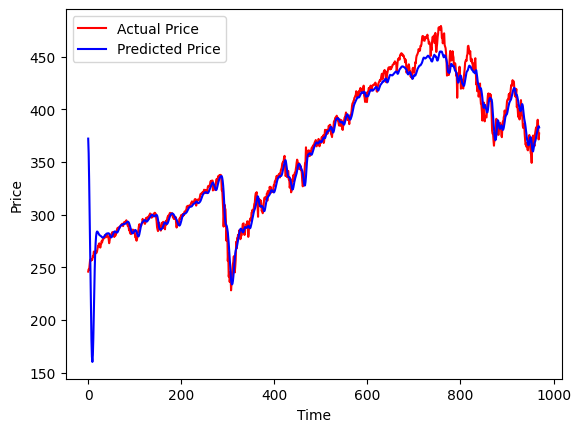

In [13]:
plt.plot(actual_stock_price, color = 'red', label = 'Actual Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()